In [1]:
!ls

 DatasetCreator.ipynb  'Volatility 100 Index_M1_115823311.csv'
 env		       'Volatility 100 Index_M1_-1994977658.csv'
 M1M5Charts	       'Volatility 100 Index_M5_159533415.csv'
 M1M5Charts.7z	       'Volatility 100 Index_M5_2052042313.csv'


In [ ]:
'Volatility 100 Index_M1_115823311.csv' m1short
'Volatility 100 Index_M1_-1994977658.csv' m1 long

In [1]:
import pandas as pd
import os, csv, codecs, shutil
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

In [2]:
import time
class DatasetCreator:
    def __init__(self, m1shortfilename, m1longfilename, m5shortfilename, m5longfilename):
        self.m1short = self.create(m1shortfilename)
        self.m1long = self.create(m1longfilename)
        self.m5long = self.create(m5longfilename)
        self.m5short = self.create(m5shortfilename)
        
        
        
    def create(self, csvname):
        with codecs.open(csvname, mode='r', encoding='utf-16-le', errors='ignore') as f:
            reader = csv.reader(f, delimiter=",")
            data = []
            for row in reader:
                row[0] = row[0].lstrip('\ufeff')
                data.append(row)
        columns = ['TimeStamp', 'image_path', 'Open', 'Close', 'High', 'Low', 'Ask', 'Bid',
               'MA 5', 'MA 8', 'MA 10', 'MA 14', 'MA 18', 'MA 24', 'MA 30', 'MA 50',
               'MA 100', 'MA 200', 'Stochastic %K', 'Stochastic %D', 'RSI', 'MACD',
               'MACD Signal', 'Volume', 'Spread', 'Account Balance', 'Profit',
               'Take Profit', 'Stop Loss', 'Trailing Stop', 'Lot Size','unknown']
        forex_data = pd.DataFrame(data, columns = columns)
        data = []
        reader = []
        return self.clean_up_files(forex_data)
    
    def clean_up_files(self, data):
        data["image_path"] = data["image_path"].apply(self.rename_file)
        return data
    def rename_file(self,filename):
        new_filename = filename.replace(' ', '_')
        # os.rename(filename, new_filename)
        return new_filename
    def display_row_images(self,q,t,s,c):
        imageq = Image.open(f"M1M5Charts/{q}")
        imaget = Image.open(f"M1M5Charts/{t}")
        images = Image.open(f"M1M5Charts/{s}")
        imagec = Image.open(f"M1M5Charts/{c}")
        # Calculate the required dimensions for the new image
        new_width = imageq.width * 4
        new_height = imageq.height
        # Create a new image with the required dimensions
        new_image = Image.new("RGB", (new_width, new_height))
        # Paste the individual images side by side
        new_image.paste(imageq, (0, 0))
        new_image.paste(imaget, (imageq.width, 0))
        new_image.paste(images, (imageq.width + imaget.width, 0))
        new_image.paste(imagec, (imageq.width + imaget.width + images.width, 0))
        # Display the final image
        display(new_image) 
    

In [3]:
datasetCreator = DatasetCreator('Volatility 100 Index_M1_115823311.csv','Volatility 100 Index_M1_-1994977658.csv', 'Volatility 100 Index_M5_2052042313.csv','Volatility 100 Index_M5_159533415.csv')

# M5long description

In [4]:
datasetCreator.m1long.head(1)

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:30,Volatility_100_Index_M1_-19949776582023.04.11-...,7321.3100,7330.4100,7333.6200,7320.9700,7332.0800,7330.4100,7326.0440,7319.2562,...,-4.8216,16,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,27


In [95]:
datasetCreator.m1short.head(1)

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:38,Volatility_100_Index_M1_1158233112023.04.11-04...,7321.3100,7328.4000,7333.6200,7320.9700,7330.0700,7328.4000,7325.6420,7319.0050,...,-4.8395,20,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,32


In [101]:
datasetCreator.m5short.head(1)

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:22,Volatility_100_Index_M5_20520423132023.04.11-0...,7305.4000,7333.6200,7343.1200,7305.4000,7335.2900,7333.6200,7334.2700,7332.0225,...,-47.1490,101,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,19


In [100]:
datasetCreator.m5long.head(1)

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:13,Volatility_100_Index_M5_1595334152023.04.11-04...,7305.4000,7326.2800,7343.1200,7305.4000,7327.9500,7326.2800,7332.8020,7331.1050,...,-47.2140,96,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,35


# M5 long Start index

In [68]:
datasetCreator.m5long.iloc[15]["image_path"]

'Volatility_100_Index_M1_1158233112023.04.11-04:49:08_7323_7321.png'

In [ ]:
datasetCreator.display_row_images(datasetCreator.m5long.iloc[15]["image_path"],datasetCreator.m5long.iloc[15+32]["image_path"],datasetCreator.m5long.iloc[15+64]["image_path"],datasetCreator.m5long.iloc[15+96]["image_path"])

# Display images

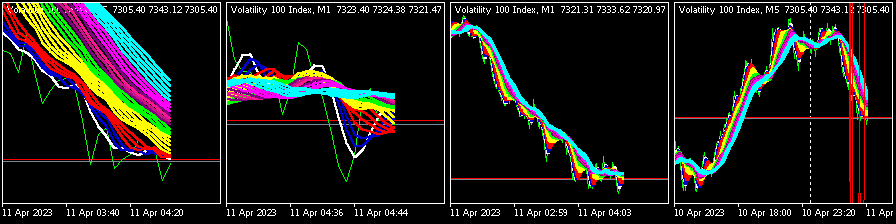

In [105]:
datasetCreator.display_row_images(datasetCreator.m5short.iloc[15]["image_path"],datasetCreator.m1short.iloc[15]["image_path"],datasetCreator.m1long.iloc[15]["image_path"],datasetCreator.m5long.iloc[15]["image_path"])

In [119]:
datasetCreator.m5long.iloc[15]["image_path"]

'Volatility_100_Index_M5_1595334152023.04.11-04:48:38_7330_7328.png'

In [111]:
datasetCreator.m5short.iloc[8]["image_path"]

'Volatility_100_Index_M5_20520423132023.04.11-04:48:38_7330_7328.png'

In [120]:
datasetCreator.m1long.iloc[5]["image_path"]

'Volatility_100_Index_M1_-19949776582023.04.11-04:48:38_7330_7328.png'

In [118]:
datasetCreator.m1short.iloc[0]["image_path"]

'Volatility_100_Index_M1_1158233112023.04.11-04:48:38_7330_7328.png'

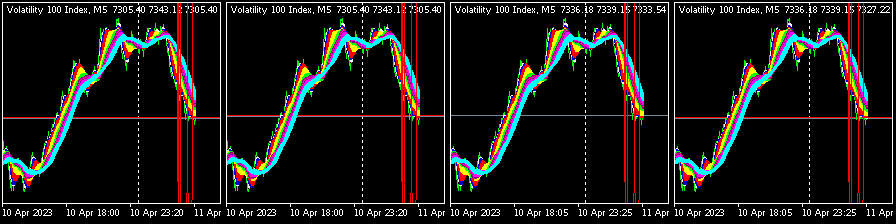

In [106]:
datasetCreator.display_row_images(datasetCreator.m5long.iloc[15]["image_path"],datasetCreator.m5long.iloc[15+32]["image_path"],datasetCreator.m5long.iloc[15+64]["image_path"],datasetCreator.m5long.iloc[15+96]["image_path"])

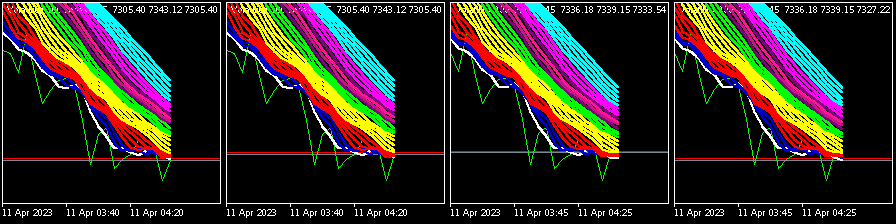

In [121]:
datasetCreator.display_row_images(datasetCreator.m5short.iloc[8]["image_path"],datasetCreator.m5short.iloc[8+32]["image_path"],datasetCreator.m5short.iloc[8+64]["image_path"],datasetCreator.m5short.iloc[8+96]["image_path"])

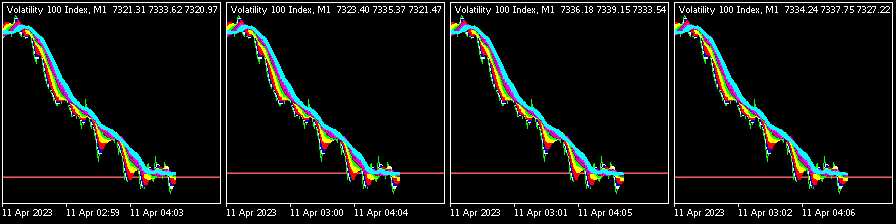

In [122]:
datasetCreator.display_row_images(datasetCreator.m1long.iloc[5]["image_path"],datasetCreator.m1long.iloc[5+32]["image_path"],datasetCreator.m1long.iloc[5+64]["image_path"],datasetCreator.m1long.iloc[5+96]["image_path"])

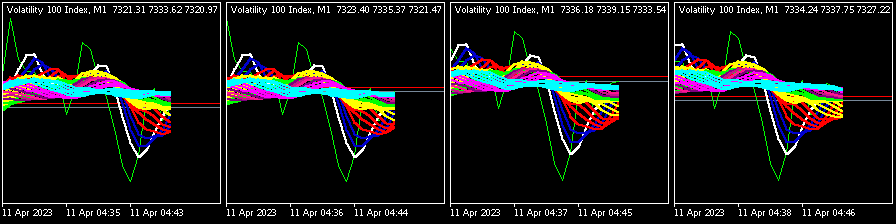

In [123]:
datasetCreator.display_row_images(datasetCreator.m1short.iloc[0]["image_path"],datasetCreator.m1short.iloc[32]["image_path"],datasetCreator.m1short.iloc[64]["image_path"],datasetCreator.m1short.iloc[96]["image_path"])

Slicing sections
M5 section

In [125]:
m5long.head(1)

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
15,2023.04.11-04:48:38,Volatility_100_Index_M5_1595334152023.04.11-04...,7305.4000,7328.4000,7343.1200,7305.4000,7330.0700,7328.4000,7333.2260,7331.3700,...,-47.1952,109,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8


In [5]:
m5long = datasetCreator.m5long.iloc[15:][:]
m5short = datasetCreator.m5short.iloc[8:][:]

In [6]:
m1long = datasetCreator.m1long.iloc[5:-2][:]
m1short = datasetCreator.m1short.iloc[0:-1][:]

In [7]:
print(f"m5 long len {len(m5long)} m5 short {len(m5short)}")
print(f"m1 long len {len(m1long)} m1 short {len(m1short)}")

m5 long len 39260 m5 short 39260
m1 long len 39260 m1 short 39260


In [12]:
list_m1long = []
list_m1short = []
list_m5long = []
list_m5short = []

for key, value in enumerate(list(range(0, 39260, 4))):
    # print(key, value)
    list_m5long.append(m5long.iloc[value].values.tolist())
    list_m5short.append(m5short.iloc[value].values.tolist())
    list_m1long.append(m1long.iloc[value].values.tolist())
    list_m1short.append(m1short.iloc[value].values.tolist())
    
    # if key == 20: break
columns = ['TimeStamp', 'image_path', 'Open', 'Close', 'High', 'Low', 'Ask', 'Bid',
               'MA 5', 'MA 8', 'MA 10', 'MA 14', 'MA 18', 'MA 24', 'MA 30', 'MA 50',
               'MA 100', 'MA 200', 'Stochastic %K', 'Stochastic %D', 'RSI', 'MACD',
               'MACD Signal', 'Volume', 'Spread', 'Account Balance', 'Profit',
               'Take Profit', 'Stop Loss', 'Trailing Stop', 'Lot Size','unknown']
final_m5long = pd.DataFrame(data=list_m5long, columns=columns)
final_m5short = pd.DataFrame(data=list_m5short, columns=columns)
final_m1long = pd.DataFrame(data=list_m1long, columns=columns)
final_m1short = pd.DataFrame(data=list_m1short, columns=columns)

list_m1long = []
list_m1short = []
list_m5long = []
list_m5short = []



In [13]:
final_m1short.to_csv("final_complete_m1short_timestep_4.csv", index=False)
final_m5short.to_csv("final_complete_m5short_timestep_4.csv", index=False)

final_m1long.to_csv("final_complete_m1long_timestep_4.csv", index=False)
final_m5long.to_csv("final_complete_m5long_timestep_4.csv", index=False)

In [171]:
final_m5long.head()

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:38,Volatility_100_Index_M5_1595334152023.04.11-04...,7305.4000,7328.4000,7343.1200,7305.4000,7330.0700,7328.4000,7333.2260,7331.3700,...,-47.1952,109,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8
1,2023.04.11-04:49:42,Volatility_100_Index_M5_1595334152023.04.11-04...,7305.4000,7334.7300,7343.1200,7305.4000,7336.4000,7334.7300,7334.4920,7332.1613,...,-47.1391,141,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8
2,2023.04.11-04:50:46,Volatility_100_Index_M5_1595334152023.04.11-04...,7336.1800,7335.9100,7339.1500,7333.5400,7337.5800,7335.9100,7332.1500,7334.0613,...,-46.2762,24,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,10
3,2023.04.11-04:51:50,Volatility_100_Index_M5_1595334152023.04.11-04...,7336.1800,7328.5400,7339.1500,7327.2200,7330.2100,7328.5400,7330.6760,7333.1400,...,-46.3415,56,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8
4,2023.04.11-04:52:54,Volatility_100_Index_M5_1595334152023.04.11-04...,7336.1800,7343.9500,7345.0100,7327.2200,7345.6200,7343.9500,7333.7580,7335.0663,...,-46.2049,88,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8


In [172]:
final_m5short.head()

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:38,Volatility_100_Index_M5_20520423132023.04.11-0...,7305.4000,7328.4000,7343.1200,7305.4000,7330.0700,7328.4000,7333.2260,7331.3700,...,-47.1952,109,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,32
1,2023.04.11-04:49:42,Volatility_100_Index_M5_20520423132023.04.11-0...,7305.4000,7334.7300,7343.1200,7305.4000,7336.4000,7334.7300,7334.4920,7332.1613,...,-47.1391,141,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,25
2,2023.04.11-04:50:46,Volatility_100_Index_M5_20520423132023.04.11-0...,7336.1800,7335.9100,7339.1500,7333.5400,7337.5800,7335.9100,7332.1500,7334.0613,...,-46.2762,24,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,31
3,2023.04.11-04:51:50,Volatility_100_Index_M5_20520423132023.04.11-0...,7336.1800,7328.5400,7339.1500,7327.2200,7330.2100,7328.5400,7330.6760,7333.1400,...,-46.3415,56,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,30
4,2023.04.11-04:52:54,Volatility_100_Index_M5_20520423132023.04.11-0...,7336.1800,7343.9500,7345.0100,7327.2200,7345.6200,7343.9500,7333.7580,7335.0663,...,-46.2049,88,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,25


In [173]:
final_m1long.head()

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:38,Volatility_100_Index_M1_-19949776582023.04.11-...,7321.3100,7328.4000,7333.6200,7320.9700,7330.0700,7328.4000,7325.6420,7319.0050,...,-4.8395,20,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,4
1,2023.04.11-04:49:40,Volatility_100_Index_M1_-19949776582023.04.11-...,7323.4000,7334.8500,7335.3700,7321.4700,7336.5200,7334.8500,7329.9420,7320.3362,...,-5.2315,21,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8
2,2023.04.11-04:50:44,Volatility_100_Index_M1_-19949776582023.04.11-...,7336.1800,7334.7100,7339.1500,7333.5400,7336.3800,7334.7100,7330.6580,7324.0450,...,-5.3168,23,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,8
3,2023.04.11-04:51:48,Volatility_100_Index_M1_-19949776582023.04.11-...,7334.2400,7328.2900,7337.7500,7327.2200,7329.9600,7328.2900,7328.8320,7327.5850,...,-5.1409,25,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,7
4,2023.04.11-04:52:52,Volatility_100_Index_M1_-19949776582023.04.11-...,7335.4900,7345.0100,7345.0100,7331.2800,7346.6800,7345.0100,7334.7100,7333.0262,...,-4.4035,27,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,9


In [174]:
final_m1short.head()

,TimeStamp,image_path,Open,Close,High,Low,Ask,Bid,MA 5,MA 8,...,MACD Signal,Volume,Spread,Account Balance,Profit,Take Profit,Stop Loss,Trailing Stop,Lot Size,unknown
0,2023.04.11-04:48:38,Volatility_100_Index_M1_1158233112023.04.11-04...,7321.3100,7328.4000,7333.6200,7320.9700,7330.0700,7328.4000,7325.6420,7319.0050,...,-4.8395,20,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,32
1,2023.04.11-04:49:42,Volatility_100_Index_M1_1158233112023.04.11-04...,7323.4000,7334.7300,7335.3700,7321.4700,7336.4000,7334.7300,7329.9180,7320.3212,...,-5.2326,22,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,4
2,2023.04.11-04:50:46,Volatility_100_Index_M1_1158233112023.04.11-04...,7336.1800,7335.9100,7339.1500,7333.5400,7337.5800,7335.9100,7330.8980,7324.1950,...,-5.3062,24,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,4
3,2023.04.11-04:51:50,Volatility_100_Index_M1_1158233112023.04.11-04...,7334.2400,7328.5400,7337.7500,7327.2200,7330.2100,7328.5400,7328.8820,7327.6162,...,-5.1387,26,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,4
4,2023.04.11-04:52:54,Volatility_100_Index_M1_1158233112023.04.11-04...,7335.4900,7343.9500,7345.0100,7331.2800,7345.6200,7343.9500,7334.4980,7332.8937,...,-4.4129,28,167.0000,10151.8000,0.0000,20.1111,20.1111,20.1111,0.2000,4


In [177]:
len(final_m1short)

1227

In [ ]:
for key, value in enumerate(range(3, 1228)):
    print(key,value)
    datasetCreator.display_row_images(final_m1short.iloc[value-3]["image_path"],final_m1short.iloc[value-2]["image_path"],final_m1short.iloc[value-1]["image_path"],final_m1short.iloc[value]["image_path"])
    datasetCreator.display_row_images(final_m1long.iloc[value-3]["image_path"],final_m1long.iloc[value-2]["image_path"],final_m1long.iloc[value-1]["image_path"],final_m1long.iloc[value]["image_path"])
    datasetCreator.display_row_images(final_m5long.iloc[value-3]["image_path"],final_m5long.iloc[value-2]["image_path"],final_m5long.iloc[value-1]["image_path"],final_m5long.iloc[value]["image_path"])
    datasetCreator.display_row_images(final_m5short.iloc[value-3]["image_path"],final_m5short.iloc[value-2]["image_path"],final_m5short.iloc[value-1]["image_path"],final_m5short.iloc[value]["image_path"])
    
    print(f"\n\nValue {key}:{value} \n\n")
    if key == 10:break

In [187]:
#@title
class ForexEnv():
    def __init__(self, m5long, m5short, m1long, m1short):
        self.forex_m5long       = m5long
        self.forex_m5short      = m5short
        self.forex_m1long       = m1long
        self.forex_m1short      = m1short
        self.current_trade      = {}
        self.position           = None
        self.profit             = 0.0
        self.holding            = 0
        self.take_profit        = 50.0
        self.stop_loss          = 50.0
        self.stop_price         = 0.0
        self.trailing_loss      = 0.0
        self.lot_size           = 0.1
        self.pip_value          = 1.5
        self.current_step       = 126
        self.current_end        = len(self.forex_m1short)
        self.account_balance    = 1000.0
        self.balance_limit      = 900
        self.profit_limit       = -50
        self.done               = 0
        self.target_lookahead   = 1
        self.current_trade      = {
                                    "current_price"   : 0.0,
                                    "entry_price"   : 0.0,
                                    "stop_loss"     : 0.0,
                                    "take_profit"   : 0.0,
                                    "stop_price"    : 0.0,
                                    "profit"        : 0.0,                                    
                                    "pnl"           : 0.0 
        }
        self.account_balance_norm = MinMaxScaler(feature_range=(0, 1))
        self.holding_norm =     MinMaxScaler(feature_range=(0, 1))
        self.profit_norm =      MinMaxScaler(feature_range=(0, 1))
        self.action_norm=   MinMaxScaler(feature_range=(0, 1))
        self.total_pips = 100
        self.init_scalers()
        
    def reset(self):
        self.current_trade = {
            "entry_price" : 5000.0,
            "current_price": 5000.0,
            "stop_loss":5000.0,
            "take_profit" : 100.0,
            "stop_price": 5000.0,
            "profit": 0.0,
            "pnl":0.0
        }
        self.position = None
        self.holding = 0
        self.profit = 0.0
        self.current_step = 4
        self.account_balance = 1000.0
        self.done = 0
        
        return self.get_observation(self.current_step - 1 , 0, 0.0,0.0,0.0)

    def read_image(self, image_path):
        directory = "colab/dataset/episode1/"
        return np.asarray(Image.open(directory+image_path))/255
    

    def step(self, action, test=False):
        reward = 0
        self.stop_price = 0.0
        
        if self.position == None:
            if action == 0:
                self.position = "long"
                self.holding = 0
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price - self.stop_loss,
                    "take_profit": current_price + self.take_profit,
                    "stop_price": current_price - self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0 
                }
                self.stop_price = 0.0
            elif action == 1:
                self.holding = 1
                self.position = "short"
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price + self.stop_loss,
                    "take_profit": current_price - self.take_profit,
                    "stop_price": current_price + self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0
                }
                self.stop_price = current_price - self.take_profit
            # elif action == 0:

            #     self.current_trade = {
            #         "entry_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "current_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_loss": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "take_profit": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "profit": 0.0,
            #         "pnl": 0.0
            #     }
            #     self.profit = 0
            #     self.position = None
            #     self.holding = 0
        elif self.position == "long":
            if action == 0:
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0
                    
              
            elif action == 1:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                try:              
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0                
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.current_trade["current_price"] = current_price
                self.account_balance += self.current_trade["pnl"]
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price  


            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )             
            #     except:
            #         reward = 0                 
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] =  (current_price - self.current_trade["entry_price"]) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"]                 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                               
        elif self.position == "short":
            if action == 0:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                try:               
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0                
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.account_balance += self.current_trade["pnl"] 
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price

            elif action == 1:
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade["current_price"] = current_price
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]  

            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
            #     except:
            #         reward = 0                
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"] 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                
        self.current_step += 1
        if self.current_step >= self.current_end + 1:
            self.done = 1
        if  int(self.account_balance) < self.balance_limit or self.current_trade["profit"]< self.profit_limit:
            reward = -1
            self.done = 1
            
        info = {
            "_step": self.current_step,
            "pos": self.position,
            "done":self.done,
            "c_trade": self.current_trade,
            "balance": "{:.2f}".format(self.account_balance),
            "reward": reward,
            "c_price": float(self.forex_data.iloc[self.current_step]["Bid"]) if self.position == "long" else float(self.forex_data.iloc[self.current_step]["Ask"])
        }
        if test:
            next_state, long_short_dict = self.observation_generator(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        else:
            next_state,long_short_dict = self.get_observation(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        long_short_dict["reward"] = reward
        long_short_dict["done"] = self.done
        long_short_dict["info"] = info
        
        return next_state, look_short_dict

    def get_observation(self, time, action, account_balance, profit, holding):
        #m5long
        long_short_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        m5long_last_image         =       self.read_image(m5long_last_image_path)
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        m5long_third_image        =       self.read_image(m5long_third_image_path)
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        m5long_second_image       =       self.read_image(m5long_second_image_path)
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        m5long_current_image      =       self.read_image(m5long_current_image_path)
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        m5short_last_image         =       self.read_image(m5short_last_image_path)
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        m5short_third_image        =       self.read_image(m5short_third_image_path)
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        m5short_second_image       =       self.read_image(m5short_second_image_path)
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        m5short_current_image      =       self.read_image(m5short_current_image_path)        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        m1long_last_image         =       self.read_image(m1long_last_image_path)
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        m1long_third_image        =       self.read_image(m1long_third_image_path)
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        m1long_second_image       =       self.read_image(m1long_second_image_path)
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        m1long_current_image      =       self.read_image(m1long_current_image_path)
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        m1short_last_image         =       self.read_image(m1short_last_image_path)
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        m1short_third_image        =       self.read_image(m1short_third_image_path)
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        m1short_second_image       =       self.read_image(m1short_second_image_path)
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        m1short_current_image      =       self.read_image(m1short_current_image_path)         
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        #create image representation for this
        
        
        holding =           self.get_scaled_values("Holding", holding)
        
        action =            self.get_scaled_values("Action", action)
        array8 = np.broadcast_to(np.array([account_balance, profit, holding]).reshape(1,-1).reshape((1,1,-1)),(224,224,3))
        stacked_image   =       np.stack([
                                        m5long_last_image, m5long_third_image, m5long_second_image, m5long_current_image,
                                        m5short_last_image, m5short_third_image, m5short_second_image, m5short_current_image,
                                        m1long_last_image, m1long_third_image, m1long_second_image, m1long_current_image,
                                        m1short_last_image, m1short_third_image, m1short_second_image, m1short_current_imag, earray8], axis=2)
        
        
        stacked_image   =       stacked_image.transpose((2,0,1,3))
        stacked_image   =       np.expand_dims(stacked_image, axis=0)
        long_short_dict["state_features"] = state_features
        state_features = [account_balance, profit, holding, action]
        long_short_dict["state_features"] = state_features
        long_short_dict["now"] = time
        long_short_dict["next"] = time + 1
       
        return stacked_image, long_short_dict

      

    def observation_generator(self, time, action, account_balance, profit, holding):
        ##Add 
        longshort_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        account_balance =   self.get_scaled_values("Account Balance", self.account_balance)
        holding =           self.get_scaled_values("Holding", self.holding)
        profit =            self.get_scaled_values("Profit", profit)
        action =            self.get_scaled_values("Action", action)
        
        
        
        long_short_dict["state_features"] = [account_balance, profit, holding, action]

        return [], long_short_dict

    def get_scaled_values(self, key, value):

        elif key == "Account Balance":return self.account_balance_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Holding":        return self.holding_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Profit":         return self.profit_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Action":         return self.action_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]        
   

    
    def init_scalers(self):
        self.account_balance_norm.fit(np.array([-1000,0,10000]).reshape(-1,1))
        self.holding_norm.fit(np.array([0,2]).reshape(-1,1))
        self.profit_norm.fit(np.array([-300,0,300]).reshape(-1,1))
        self.action_norm.fit(np.array([0,1]).reshape(-1,1))

SyntaxError: invalid syntax (54199690.py, line 417)

In [187]:
#@title
class ForexEnv():
    def __init__(self, m5long, m5short, m1long, m1short):
        self.forex_m5long       = m5long
        self.forex_m5short      = m5short
        self.forex_m1long       = m1long
        self.forex_m1short      = m1short
        self.current_trade      = {}
        self.position           = None
        self.profit             = 0.0
        self.holding            = 0
        self.take_profit        = 50.0
        self.stop_loss          = 50.0
        self.stop_price         = 0.0
        self.trailing_loss      = 0.0
        self.lot_size           = 0.1
        self.pip_value          = 1.5
        self.current_step       = 126
        self.current_end        = len(self.forex_m1short)
        self.account_balance    = 1000.0
        self.balance_limit      = 900
        self.profit_limit       = -50
        self.done               = 0
        self.target_lookahead   = 1
        self.current_trade      = {
                                    "current_price"   : 0.0,
                                    "entry_price"   : 0.0,
                                    "stop_loss"     : 0.0,
                                    "take_profit"   : 0.0,
                                    "stop_price"    : 0.0,
                                    "profit"        : 0.0,                                    
                                    "pnl"           : 0.0 
        }
        self.account_balance_norm = MinMaxScaler(feature_range=(0, 1))
        self.holding_norm =     MinMaxScaler(feature_range=(0, 1))
        self.profit_norm =      MinMaxScaler(feature_range=(0, 1))
        self.action_norm=   MinMaxScaler(feature_range=(0, 1))
        self.total_pips = 100
        self.init_scalers()
        
    def reset(self):
        self.current_trade = {
            "entry_price" : 5000.0,
            "current_price": 5000.0,
            "stop_loss":5000.0,
            "take_profit" : 100.0,
            "stop_price": 5000.0,
            "profit": 0.0,
            "pnl":0.0
        }
        self.position = None
        self.holding = 0
        self.profit = 0.0
        self.current_step = 4
        self.account_balance = 1000.0
        self.done = 0
        
        return self.get_observation(self.current_step - 1 , 0, 0.0,0.0,0.0)

    def read_image(self, image_path):
        directory = "colab/dataset/episode1/"
        return np.asarray(Image.open(directory+image_path))/255
    

    def step(self, action, test=False):
        reward = 0
        self.stop_price = 0.0
        
        if self.position == None:
            if action == 0:
                self.position = "long"
                self.holding = 0
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price - self.stop_loss,
                    "take_profit": current_price + self.take_profit,
                    "stop_price": current_price - self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0 
                }
                self.stop_price = 0.0
            elif action == 1:
                self.holding = 1
                self.position = "short"
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price + self.stop_loss,
                    "take_profit": current_price - self.take_profit,
                    "stop_price": current_price + self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0
                }
                self.stop_price = current_price - self.take_profit
            # elif action == 0:

            #     self.current_trade = {
            #         "entry_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "current_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_loss": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "take_profit": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "profit": 0.0,
            #         "pnl": 0.0
            #     }
            #     self.profit = 0
            #     self.position = None
            #     self.holding = 0
        elif self.position == "long":
            if action == 0:
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0
                    
              
            elif action == 1:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                try:              
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0                
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.current_trade["current_price"] = current_price
                self.account_balance += self.current_trade["pnl"]
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price  


            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )             
            #     except:
            #         reward = 0                 
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] =  (current_price - self.current_trade["entry_price"]) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"]                 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                               
        elif self.position == "short":
            if action == 0:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                try:               
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0                
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.account_balance += self.current_trade["pnl"] 
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price

            elif action == 1:
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade["current_price"] = current_price
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]  

            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
            #     except:
            #         reward = 0                
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"] 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                
        self.current_step += 1
        if self.current_step >= self.current_end + 1:
            self.done = 1
        if  int(self.account_balance) < self.balance_limit or self.current_trade["profit"]< self.profit_limit:
            reward = -1
            self.done = 1
            
        info = {
            "_step": self.current_step,
            "pos": self.position,
            "done":self.done,
            "c_trade": self.current_trade,
            "balance": "{:.2f}".format(self.account_balance),
            "reward": reward,
            "c_price": float(self.forex_data.iloc[self.current_step]["Bid"]) if self.position == "long" else float(self.forex_data.iloc[self.current_step]["Ask"])
        }
        if test:
            next_state, long_short_dict = self.observation_generator(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        else:
            next_state,long_short_dict = self.get_observation(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        long_short_dict["reward"] = reward
        long_short_dict["done"] = self.done
        long_short_dict["info"] = info
        
        return next_state, look_short_dict

    def get_observation(self, time, action, account_balance, profit, holding):
        #m5long
        long_short_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        m5long_last_image         =       self.read_image(m5long_last_image_path)
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        m5long_third_image        =       self.read_image(m5long_third_image_path)
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        m5long_second_image       =       self.read_image(m5long_second_image_path)
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        m5long_current_image      =       self.read_image(m5long_current_image_path)
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        m5short_last_image         =       self.read_image(m5short_last_image_path)
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        m5short_third_image        =       self.read_image(m5short_third_image_path)
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        m5short_second_image       =       self.read_image(m5short_second_image_path)
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        m5short_current_image      =       self.read_image(m5short_current_image_path)        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        m1long_last_image         =       self.read_image(m1long_last_image_path)
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        m1long_third_image        =       self.read_image(m1long_third_image_path)
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        m1long_second_image       =       self.read_image(m1long_second_image_path)
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        m1long_current_image      =       self.read_image(m1long_current_image_path)
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        m1short_last_image         =       self.read_image(m1short_last_image_path)
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        m1short_third_image        =       self.read_image(m1short_third_image_path)
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        m1short_second_image       =       self.read_image(m1short_second_image_path)
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        m1short_current_image      =       self.read_image(m1short_current_image_path)         
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        #create image representation for this
        
        
        holding =           self.get_scaled_values("Holding", holding)
        
        action =            self.get_scaled_values("Action", action)
        array8 = np.broadcast_to(np.array([account_balance, profit, holding]).reshape(1,-1).reshape((1,1,-1)),(224,224,3))
        stacked_image   =       np.stack([
                                        m5long_last_image, m5long_third_image, m5long_second_image, m5long_current_image,
                                        m5short_last_image, m5short_third_image, m5short_second_image, m5short_current_image,
                                        m1long_last_image, m1long_third_image, m1long_second_image, m1long_current_image,
                                        m1short_last_image, m1short_third_image, m1short_second_image, m1short_current_imag, earray8], axis=2)
        
        
        stacked_image   =       stacked_image.transpose((2,0,1,3))
        stacked_image   =       np.expand_dims(stacked_image, axis=0)
        long_short_dict["state_features"] = state_features
        state_features = [account_balance, profit, holding, action]
        long_short_dict["state_features"] = state_features
        long_short_dict["now"] = time
        long_short_dict["next"] = time + 1
       
        return stacked_image, long_short_dict

      

    def observation_generator(self, time, action, account_balance, profit, holding):
        ##Add 
        longshort_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        account_balance =   self.get_scaled_values("Account Balance", self.account_balance)
        holding =           self.get_scaled_values("Holding", self.holding)
        profit =            self.get_scaled_values("Profit", profit)
        action =            self.get_scaled_values("Action", action)
        
        
        
        long_short_dict["state_features"] = [account_balance, profit, holding, action]

        return [], long_short_dict

    def get_scaled_values(self, key, value):

        elif key == "Account Balance":return self.account_balance_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Holding":        return self.holding_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Profit":         return self.profit_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Action":         return self.action_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]        
   

    
    def init_scalers(self):
        self.account_balance_norm.fit(np.array([-1000,0,10000]).reshape(-1,1))
        self.holding_norm.fit(np.array([0,2]).reshape(-1,1))
        self.profit_norm.fit(np.array([-300,0,300]).reshape(-1,1))
        self.action_norm.fit(np.array([0,1]).reshape(-1,1))

SyntaxError: invalid syntax (54199690.py, line 417)

In [187]:
#@title
class ForexEnv():
    def __init__(self, m5long, m5short, m1long, m1short):
        self.forex_m5long       = m5long
        self.forex_m5short      = m5short
        self.forex_m1long       = m1long
        self.forex_m1short      = m1short
        self.current_trade      = {}
        self.position           = None
        self.profit             = 0.0
        self.holding            = 0
        self.take_profit        = 50.0
        self.stop_loss          = 50.0
        self.stop_price         = 0.0
        self.trailing_loss      = 0.0
        self.lot_size           = 0.1
        self.pip_value          = 1.5
        self.current_step       = 126
        self.current_end        = len(self.forex_m1short)
        self.account_balance    = 1000.0
        self.balance_limit      = 900
        self.profit_limit       = -50
        self.done               = 0
        self.target_lookahead   = 1
        self.current_trade      = {
                                    "current_price"   : 0.0,
                                    "entry_price"   : 0.0,
                                    "stop_loss"     : 0.0,
                                    "take_profit"   : 0.0,
                                    "stop_price"    : 0.0,
                                    "profit"        : 0.0,                                    
                                    "pnl"           : 0.0 
        }
        self.account_balance_norm = MinMaxScaler(feature_range=(0, 1))
        self.holding_norm =     MinMaxScaler(feature_range=(0, 1))
        self.profit_norm =      MinMaxScaler(feature_range=(0, 1))
        self.action_norm=   MinMaxScaler(feature_range=(0, 1))
        self.total_pips = 100
        self.init_scalers()
        
    def reset(self):
        self.current_trade = {
            "entry_price" : 5000.0,
            "current_price": 5000.0,
            "stop_loss":5000.0,
            "take_profit" : 100.0,
            "stop_price": 5000.0,
            "profit": 0.0,
            "pnl":0.0
        }
        self.position = None
        self.holding = 0
        self.profit = 0.0
        self.current_step = 4
        self.account_balance = 1000.0
        self.done = 0
        
        return self.get_observation(self.current_step - 1 , 0, 0.0,0.0,0.0)

    def read_image(self, image_path):
        directory = "colab/dataset/episode1/"
        return np.asarray(Image.open(directory+image_path))/255
    

    def step(self, action, test=False):
        reward = 0
        self.stop_price = 0.0
        
        if self.position == None:
            if action == 0:
                self.position = "long"
                self.holding = 0
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price - self.stop_loss,
                    "take_profit": current_price + self.take_profit,
                    "stop_price": current_price - self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0 
                }
                self.stop_price = 0.0
            elif action == 1:
                self.holding = 1
                self.position = "short"
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price + self.stop_loss,
                    "take_profit": current_price - self.take_profit,
                    "stop_price": current_price + self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0
                }
                self.stop_price = current_price - self.take_profit
            # elif action == 0:

            #     self.current_trade = {
            #         "entry_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "current_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_loss": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "take_profit": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "profit": 0.0,
            #         "pnl": 0.0
            #     }
            #     self.profit = 0
            #     self.position = None
            #     self.holding = 0
        elif self.position == "long":
            if action == 0:
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0
                    
              
            elif action == 1:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                try:              
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0                
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.current_trade["current_price"] = current_price
                self.account_balance += self.current_trade["pnl"]
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price  


            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )             
            #     except:
            #         reward = 0                 
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] =  (current_price - self.current_trade["entry_price"]) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"]                 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                               
        elif self.position == "short":
            if action == 0:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                try:               
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0                
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.account_balance += self.current_trade["pnl"] 
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price

            elif action == 1:
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade["current_price"] = current_price
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]  

            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
            #     except:
            #         reward = 0                
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"] 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                
        self.current_step += 1
        if self.current_step >= self.current_end + 1:
            self.done = 1
        if  int(self.account_balance) < self.balance_limit or self.current_trade["profit"]< self.profit_limit:
            reward = -1
            self.done = 1
            
        info = {
            "_step": self.current_step,
            "pos": self.position,
            "done":self.done,
            "c_trade": self.current_trade,
            "balance": "{:.2f}".format(self.account_balance),
            "reward": reward,
            "c_price": float(self.forex_data.iloc[self.current_step]["Bid"]) if self.position == "long" else float(self.forex_data.iloc[self.current_step]["Ask"])
        }
        if test:
            next_state, long_short_dict = self.observation_generator(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        else:
            next_state,long_short_dict = self.get_observation(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        long_short_dict["reward"] = reward
        long_short_dict["done"] = self.done
        long_short_dict["info"] = info
        
        return next_state, look_short_dict

    def get_observation(self, time, action, account_balance, profit, holding):
        #m5long
        long_short_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        m5long_last_image         =       self.read_image(m5long_last_image_path)
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        m5long_third_image        =       self.read_image(m5long_third_image_path)
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        m5long_second_image       =       self.read_image(m5long_second_image_path)
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        m5long_current_image      =       self.read_image(m5long_current_image_path)
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        m5short_last_image         =       self.read_image(m5short_last_image_path)
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        m5short_third_image        =       self.read_image(m5short_third_image_path)
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        m5short_second_image       =       self.read_image(m5short_second_image_path)
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        m5short_current_image      =       self.read_image(m5short_current_image_path)        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        m1long_last_image         =       self.read_image(m1long_last_image_path)
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        m1long_third_image        =       self.read_image(m1long_third_image_path)
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        m1long_second_image       =       self.read_image(m1long_second_image_path)
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        m1long_current_image      =       self.read_image(m1long_current_image_path)
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        m1short_last_image         =       self.read_image(m1short_last_image_path)
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        m1short_third_image        =       self.read_image(m1short_third_image_path)
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        m1short_second_image       =       self.read_image(m1short_second_image_path)
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        m1short_current_image      =       self.read_image(m1short_current_image_path)         
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        #create image representation for this
        
        
        holding =           self.get_scaled_values("Holding", holding)
        
        action =            self.get_scaled_values("Action", action)
        array8 = np.broadcast_to(np.array([account_balance, profit, holding]).reshape(1,-1).reshape((1,1,-1)),(224,224,3))
        stacked_image   =       np.stack([
                                        m5long_last_image, m5long_third_image, m5long_second_image, m5long_current_image,
                                        m5short_last_image, m5short_third_image, m5short_second_image, m5short_current_image,
                                        m1long_last_image, m1long_third_image, m1long_second_image, m1long_current_image,
                                        m1short_last_image, m1short_third_image, m1short_second_image, m1short_current_imag, earray8], axis=2)
        
        
        stacked_image   =       stacked_image.transpose((2,0,1,3))
        stacked_image   =       np.expand_dims(stacked_image, axis=0)
        long_short_dict["state_features"] = state_features
        state_features = [account_balance, profit, holding, action]
        long_short_dict["state_features"] = state_features
        long_short_dict["now"] = time
        long_short_dict["next"] = time + 1
       
        return stacked_image, long_short_dict

      

    def observation_generator(self, time, action, account_balance, profit, holding):
        ##Add 
        longshort_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        account_balance =   self.get_scaled_values("Account Balance", self.account_balance)
        holding =           self.get_scaled_values("Holding", self.holding)
        profit =            self.get_scaled_values("Profit", profit)
        action =            self.get_scaled_values("Action", action)
        
        
        
        long_short_dict["state_features"] = [account_balance, profit, holding, action]

        return [], long_short_dict

    def get_scaled_values(self, key, value):

        elif key == "Account Balance":return self.account_balance_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Holding":        return self.holding_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Profit":         return self.profit_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Action":         return self.action_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]        
   

    
    def init_scalers(self):
        self.account_balance_norm.fit(np.array([-1000,0,10000]).reshape(-1,1))
        self.holding_norm.fit(np.array([0,2]).reshape(-1,1))
        self.profit_norm.fit(np.array([-300,0,300]).reshape(-1,1))
        self.action_norm.fit(np.array([0,1]).reshape(-1,1))

SyntaxError: invalid syntax (54199690.py, line 417)

In [187]:
#@title
class ForexEnv():
    def __init__(self, m5long, m5short, m1long, m1short):
        self.forex_m5long       = m5long
        self.forex_m5short      = m5short
        self.forex_m1long       = m1long
        self.forex_m1short      = m1short
        self.current_trade      = {}
        self.position           = None
        self.profit             = 0.0
        self.holding            = 0
        self.take_profit        = 50.0
        self.stop_loss          = 50.0
        self.stop_price         = 0.0
        self.trailing_loss      = 0.0
        self.lot_size           = 0.1
        self.pip_value          = 1.5
        self.current_step       = 126
        self.current_end        = len(self.forex_m1short)
        self.account_balance    = 1000.0
        self.balance_limit      = 900
        self.profit_limit       = -50
        self.done               = 0
        self.target_lookahead   = 1
        self.current_trade      = {
                                    "current_price"   : 0.0,
                                    "entry_price"   : 0.0,
                                    "stop_loss"     : 0.0,
                                    "take_profit"   : 0.0,
                                    "stop_price"    : 0.0,
                                    "profit"        : 0.0,                                    
                                    "pnl"           : 0.0 
        }
        self.account_balance_norm = MinMaxScaler(feature_range=(0, 1))
        self.holding_norm =     MinMaxScaler(feature_range=(0, 1))
        self.profit_norm =      MinMaxScaler(feature_range=(0, 1))
        self.action_norm=   MinMaxScaler(feature_range=(0, 1))
        self.total_pips = 100
        self.init_scalers()
        
    def reset(self):
        self.current_trade = {
            "entry_price" : 5000.0,
            "current_price": 5000.0,
            "stop_loss":5000.0,
            "take_profit" : 100.0,
            "stop_price": 5000.0,
            "profit": 0.0,
            "pnl":0.0
        }
        self.position = None
        self.holding = 0
        self.profit = 0.0
        self.current_step = 4
        self.account_balance = 1000.0
        self.done = 0
        
        return self.get_observation(self.current_step - 1 , 0, 0.0,0.0,0.0)

    def read_image(self, image_path):
        directory = "colab/dataset/episode1/"
        return np.asarray(Image.open(directory+image_path))/255
    

    def step(self, action, test=False):
        reward = 0
        self.stop_price = 0.0
        
        if self.position == None:
            if action == 0:
                self.position = "long"
                self.holding = 0
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price - self.stop_loss,
                    "take_profit": current_price + self.take_profit,
                    "stop_price": current_price - self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0 
                }
                self.stop_price = 0.0
            elif action == 1:
                self.holding = 1
                self.position = "short"
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade = {
                    "entry_price": current_price,
                    "current_price": current_price,
                    "stop_loss": current_price + self.stop_loss,
                    "take_profit": current_price - self.take_profit,
                    "stop_price": current_price + self.stop_loss,
                    "profit": 0.0,
                    "pnl": 0
                }
                self.stop_price = current_price - self.take_profit
            # elif action == 0:

            #     self.current_trade = {
            #         "entry_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "current_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_loss": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "take_profit": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "stop_price": float(self.forex_data.iloc[self.current_step]["Ask"]),
            #         "profit": 0.0,
            #         "pnl": 0.0
            #     }
            #     self.profit = 0
            #     self.position = None
            #     self.holding = 0
        elif self.position == "long":
            if action == 0:
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0
                    
              
            elif action == 1:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
                try:              
                    if current_price > self.current_trade["entry_price"]:
                        reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
                    elif self.current_trade["entry_price"] > current_price:
                        reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )
                except:
                    reward = 0                
                self.current_trade["pnl"] = (current_price - self.current_trade["entry_price"]) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.current_trade["current_price"] = current_price
                self.account_balance += self.current_trade["pnl"]
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price  


            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Bid"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = (current_price - self.current_trade["entry_price"]) / (self.current_trade["take_profit"] - self.current_trade["entry_price"])
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = -((self.current_trade["take_profit"] - current_price )/(self.current_trade["take_profit"] - self.current_trade["stop_loss"]) )             
            #     except:
            #         reward = 0                 
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] =  (current_price - self.current_trade["entry_price"]) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"]                 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                               
        elif self.position == "short":
            if action == 0:
                self.position = None
                self.holding = 2
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                try:               
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0                
                self.current_trade["current_price"] = current_price
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]
                self.account_balance += self.current_trade["pnl"] 
                self.current_trade["stop_price"] = current_price
                self.current_trade["stop_loss"] = current_price 
                self.current_trade["take_profit"] = current_price

            elif action == 1:
                current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
                self.current_trade["current_price"] = current_price
                try:
                    if current_price > self.current_trade["entry_price"]:
                        reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
                    elif self.current_trade["entry_price"] > current_price:
                        reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
                except:
                    reward = 0
                self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
                self.current_trade["profit"] = self.current_trade["pnl"]  

            # elif action == 0:
            #     self.position = None
            #     self.holding = 0
            #     current_price = float(self.forex_data.iloc[self.current_step]["Ask"])
            #     try:
            #         if current_price > self.current_trade["entry_price"]:
            #             reward = - (abs(current_price - self.current_trade["take_profit"]) / abs(self.current_trade["stop_loss"]-self.current_trade["take_profit"]))
            #         elif self.current_trade["entry_price"] > current_price:
            #             reward = (current_price-self.current_trade["entry_price"]) / (self.current_trade["entry_price"]-self.current_trade["stop_loss"])
            #     except:
            #         reward = 0                
            #     self.current_trade["current_price"] = current_price
            #     self.current_trade["pnl"] = (self.current_trade["entry_price"] - current_price) 
            #     self.current_trade["profit"] = self.current_trade["pnl"]
            #     self.account_balance += self.current_trade["pnl"] 

            #     self.current_trade["stop_loss"] = current_price 
            #     self.current_trade["take_profit"] = current_price
            #     self.current_trade["stop_price"] = current_price                
        self.current_step += 1
        if self.current_step >= self.current_end + 1:
            self.done = 1
        if  int(self.account_balance) < self.balance_limit or self.current_trade["profit"]< self.profit_limit:
            reward = -1
            self.done = 1
            
        info = {
            "_step": self.current_step,
            "pos": self.position,
            "done":self.done,
            "c_trade": self.current_trade,
            "balance": "{:.2f}".format(self.account_balance),
            "reward": reward,
            "c_price": float(self.forex_data.iloc[self.current_step]["Bid"]) if self.position == "long" else float(self.forex_data.iloc[self.current_step]["Ask"])
        }
        if test:
            next_state, long_short_dict = self.observation_generator(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        else:
            next_state,long_short_dict = self.get_observation(self.current_step + self.target_lookahead, self.get_scaled_values("Action", action),self.get_scaled_values("Account Balance", self.account_balance), self.get_scaled_values("Profit", self.current_trade["profit"]),self.get_scaled_values("Holding", self.holding))
        long_short_dict["reward"] = reward
        long_short_dict["done"] = self.done
        long_short_dict["info"] = info
        
        return next_state, look_short_dict

    def get_observation(self, time, action, account_balance, profit, holding):
        #m5long
        long_short_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        m5long_last_image         =       self.read_image(m5long_last_image_path)
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        m5long_third_image        =       self.read_image(m5long_third_image_path)
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        m5long_second_image       =       self.read_image(m5long_second_image_path)
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        m5long_current_image      =       self.read_image(m5long_current_image_path)
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        m5short_last_image         =       self.read_image(m5short_last_image_path)
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        m5short_third_image        =       self.read_image(m5short_third_image_path)
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        m5short_second_image       =       self.read_image(m5short_second_image_path)
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        m5short_current_image      =       self.read_image(m5short_current_image_path)        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        m1long_last_image         =       self.read_image(m1long_last_image_path)
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        m1long_third_image        =       self.read_image(m1long_third_image_path)
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        m1long_second_image       =       self.read_image(m1long_second_image_path)
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        m1long_current_image      =       self.read_image(m1long_current_image_path)
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        m1short_last_image         =       self.read_image(m1short_last_image_path)
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        m1short_third_image        =       self.read_image(m1short_third_image_path)
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        m1short_second_image       =       self.read_image(m1short_second_image_path)
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        m1short_current_image      =       self.read_image(m1short_current_image_path)         
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        #create image representation for this
        
        
        holding =           self.get_scaled_values("Holding", holding)
        
        action =            self.get_scaled_values("Action", action)
        array8 = np.broadcast_to(np.array([account_balance, profit, holding]).reshape(1,-1).reshape((1,1,-1)),(224,224,3))
        stacked_image   =       np.stack([
                                        m5long_last_image, m5long_third_image, m5long_second_image, m5long_current_image,
                                        m5short_last_image, m5short_third_image, m5short_second_image, m5short_current_image,
                                        m1long_last_image, m1long_third_image, m1long_second_image, m1long_current_image,
                                        m1short_last_image, m1short_third_image, m1short_second_image, m1short_current_imag, earray8], axis=2)
        
        
        stacked_image   =       stacked_image.transpose((2,0,1,3))
        stacked_image   =       np.expand_dims(stacked_image, axis=0)
        long_short_dict["state_features"] = state_features
        state_features = [account_balance, profit, holding, action]
        long_short_dict["state_features"] = state_features
        long_short_dict["now"] = time
        long_short_dict["next"] = time + 1
       
        return stacked_image, long_short_dict

      

    def observation_generator(self, time, action, account_balance, profit, holding):
        ##Add 
        longshort_dict = {}
        
        m5long_last_image_path    =       self.forex_m5long.iloc[time-3]["image_path"]
        
        m5long_third_image_path   =       self.forex_m5long.iloc[time-2]["image_path"]
        
        m5long_second_image_path  =       self.forex_m5long.iloc[time-1]["image_path"]
        
        m5long_current_image_path =       self.forex_m5long.iloc[time]["image_path"]
        
        #save
        long_short_dict["m5long_last_image_path"] = m5long_last_image_path
        long_short_dict["m5long_third_image_path"] = m5long_third_image_path
        long_short_dict["m5long_second_image_path"] = m5long_second_image_path
        long_short_dict["m5long_current_image_path"] = m5long_current_image_path
        
        
        #m5short
        m5short_last_image_path    =       self.forex_m5short.iloc[time-3]["image_path"]
        
        m5short_third_image_path   =       self.forex_m5short.iloc[time-2]["image_path"]
        
        m5short_second_image_path  =       self.forex_m5short.iloc[time-1]["image_path"]
        
        m5short_current_image_path =       self.forex_m5short.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m5short_last_image_path"] = m5short_last_image_path
        long_short_dict["m5short_third_image_path"] = m5short_third_image_path
        long_short_dict["m5short_second_image_path"] = m5short_second_image_path
        long_short_dict["m5short_current_image_path"] = m5short_current_image_path
        
        
        #m1long
        m1long_last_image_path    =       self.forex_m1long.iloc[time-3]["image_path"]
        
        m1long_third_image_path   =       self.forex_m1long.iloc[time-2]["image_path"]
        
        m1long_second_image_path  =       self.forex_m1long.iloc[time-1]["image_path"]
        
        m1long_current_image_path =       self.forex_m1long.iloc[time]["image_path"]
        
        
        #save
        long_short_dict["m1long_last_image_path"] = m1long_last_image_path
        long_short_dict["m1long_third_image_path"] = m1long_third_image_path
        long_short_dict["m1long_second_image_path"] = m1long_second_image_path
        long_short_dict["m1long_current_image_path"] = m1long_current_image_path        
        
        #m1short
        m1short_last_image_path    =       self.forex_m1short.iloc[time-3]["image_path"]
        
        m1short_third_image_path   =       self.forex_m1short.iloc[time-2]["image_path"]
        
        m1short_second_image_path  =       self.forex_m1short.iloc[time-1]["image_path"]
        
        m1short_current_image_path =       self.forex_m1short.iloc[time]["image_path"]
        
        #save
        long_short_dict["m1short_last_image_path"] = m1short_last_image_path
        long_short_dict["m1short_third_image_path"] = m1short_third_image_path
        long_short_dict["m1short_second_image_path"] = m1short_second_image_path
        long_short_dict["m1short_current_image_path"] = m1short_current_image_path   
        
        account_balance =   self.get_scaled_values("Account Balance", self.account_balance)
        holding =           self.get_scaled_values("Holding", self.holding)
        profit =            self.get_scaled_values("Profit", profit)
        action =            self.get_scaled_values("Action", action)
        
        
        
        long_short_dict["state_features"] = [account_balance, profit, holding, action]

        return [], long_short_dict

    def get_scaled_values(self, key, value):

        elif key == "Account Balance":return self.account_balance_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Holding":        return self.holding_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Profit":         return self.profit_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]
        elif key == "Action":         return self.action_norm.transform(np.array(float(value)).reshape(-1,1))[0][0]        
   

    
    def init_scalers(self):
        self.account_balance_norm.fit(np.array([-1000,0,10000]).reshape(-1,1))
        self.holding_norm.fit(np.array([0,2]).reshape(-1,1))
        self.profit_norm.fit(np.array([-300,0,300]).reshape(-1,1))
        self.action_norm.fit(np.array([0,1]).reshape(-1,1))

SyntaxError: invalid syntax (54199690.py, line 417)

In [188]:
env = ForexEvn(final_m5long, final_m5short, final_m1long, final_m1short)


 DatasetCreator.ipynb   test
 env		       'Volatility 100 Index_M1_115823311.csv'
 filerenamer.sh        'Volatility 100 Index_M1_-1994977658.csv'
 M1M5Charts	       'Volatility 100 Index_M5_159533415.csv'
 M1M5Charts.7z	       'Volatility 100 Index_M5_2052042313.csv'
 spacefilecreator.sh


# AGENT

In [ ]:
class Agent:
    def __init__(self, state_size, action_size, env):
        self.model_name = "v19Stacked3DModel_2states_v1.0"
        self.database_normal = "v19Stacked3Database_v1.0"
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.99
        self.alpha = 0.001
        self.epsilon = 1.0
        self.epsilon_min = 0.1
        self.epsilon_decay = 0.995
        self.update_rate = 1000
        self.timesteps = 1
        self.target_update_rate = 0.06
        
        # self.actor_model = self._build_actor_model()
        # self.critic_model = self._build_critic_model()
        # self.memory_indexer = 0
        
        # #Initialize the target models with sam
        # self.target_actor_model = self._build_actor_model()
        # self.target_critic_model = self._build_critic_model()
        # self.target_critic_model.set_weights(self.critic_model.get_weights())
        self.env = env
        self.remote = False
        self.__setup__()
    
    def __setup__(self, tables = ["memory", "specialmemory",]):
        for t in tables:
            self.connect()
            self.create_tables(t)
            print(f"Created {t} table")
        self.shutdown()
        print(f"Closing database")
        time.sleep(5)

    def create_tables(self, table_name):
        #to do add primary key to this table
        if table_name == "history":
            self.cursor.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                id PRIMARY KEY AUTOINCREMENT,
                date DATE,
                name TEXT,
                number INTEGER
                )''')
        else:
            self.cursor.execute(f'''CREATE TABLE IF NOT EXISTS {table_name} (
                id PRIMARY KEY AUTOINCREMENT,
                long_short_dict TETX,
                now INTEGER,
                next INTEGER,            
                count INTEGER,
                priority INTEGER
                )''')
        self.connection.commit()


    def connect(self, ):
        #remote
        if self.remote:
            self.connection = sqlite3.connect(f"/content/drive/MyDrive/MLDatasetsVGG/colab/{self.database}.db")
        #local
        else:
            self.connection = sqlite3.connect(f"colab/{self.database}.db")
        self.cursor = self.connection.cursor()
    def shutdown(self):
        self.cursor.close()
        self.connection.close()

    def _build_base_model(self):
        model = Sequential()
        model.add(tf.keras.layers.Conv3D(32, (3,3,3), strides=(1,4,4), padding="same", input_shape=self.state_size))
        model.add(Activation('relu'))
        model.add(tf.keras.layers.Conv3D(64, (3,3,3), strides=(1,2,2), padding="same"))
        model.add(Activation('relu'))
        model.add(tf.keras.layers.Conv3D(64, (3,3,3), strides=(1,1,,1), padding="same"))
        model.add(Activation('relu'))
        model.add(Flatten())
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation='relu'))
        model.add(Dense(32, activation='relu'))
        
        return model
    # Build the actor model responsible for predicting
    
    def _build_actor_model(self):
        model = _build_base_model()
        model.add(Dense(self.action_size, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=self.alpha, rho=0.95, epsilon=None))

        return model

    
    #Build the critic model responsible for criticising and calculating the risk of the reward
    def _build_critic_model(self):
        model = _build_base_model()
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=RMSprop(learning_rate=self.alpha, rho=0.95, epsilon=None))
        
        return model

    def replay_v3(self, batch_size = 128, memory_type = "normal" ):
        update_weights = 0
        break_while = True
        while(break_while):
            # try:
            print("dataset Generator", self.memory_indexer)
            self.dataset_generator(save=True,show_images=False, clear_output = True)
            if self.memory_indexer % 2 == 0  :#and self.memory_indexer % 2 == 0:                    
                self.connect()
                self.cursor.execute(f"SELECT * FROM memory WHERE action = 0 ORDER BY RANDOM() LIMIT {batch_size*2}")
                rows = self.cursor.fetchall()
                self.cursor.execute(f"SELECT * FROM memory WHERE action = 1 ORDER BY RANDOM() LIMIT {batch_size*2}")
                rows += self.cursor.fetchall()
                self.cursor.execute(f"SELECT * FROM specialmemory WHERE action = 1 ORDER BY RANDOM() LIMIT {batch_size*2}")
                rows += self.cursor.fetchall()
                self.cursor.execute(f"SELECT * FROM specialmemory WHERE action = 0 ORDER BY RANDOM() LIMIT {batch_size*2}")
                rows += self.cursor.fetchall()
                self.shutdown()

            random.shuffle(rows)
            for i,row in enumerate(rows):            
                import json
                long_short_dict_now = json.loads(row[1])
                long_short_dict_next = json.loads(row[2])
                state , _ = self.env.get_observation(row[3], long_short_dict_now["action"], long_short_dict_now["account_balance"], long_short_dict_now["profit"], long_short_dict_now["holding"]), 
                next_state, _ = self.env.get_observation(row[4], long_short_dict_next["action"], long_short_dict_next["account_balance"], long_short_dict_next["profit"], long_short_dict_next["holding"]), #np.expand_dims(current_stacked, axis=0)
                
                reward = long_short_dict_now["reward"]
                done = long_short_dict_now["done"]
                target = reward
                action = long_short_dict_now["action"]

                headers = ["index","Variations", "Probs" ,"rewards", "Actions"]
                rows_display = []            
                if not done:
                    target = (reward + self.gamma * self.target_critic_model.predict(next_state, verbose=0)[0][0])
                target_f = self.actor_model.predict(state)
                row = [i, "target_f", ",".join(str("{:.2f}".format(x)) for x in list(target_f[0])), target]
                rows_display.append(row)
                target_f[0][action] = target
                row = [i, "suggested",  ",".join(str("{:.2f}".format(x)) for x in list(target_f[0])), action]
                rows_display.append(row)
                
                #You need to test after every 64 epochs
                #test an episode with a certain number of lists
                if i % 64 == 0:
                    self.dataset_generator(save=False,show_images=True, clear_output = False)

                self.actor_model.fit(state, target_f, epochs=2, verbose=1)
                target_critic = np.array([[target]])
                self.critic_model.fit(state, target_critic, epochs=2, verbose=1)

                row = [i, "final", ",".join(str("{:.2f}".format(x)) for x in list(self.actor_model.predict(state, verbose=0)[0])), self.critic_model.predict(state, verbose=0)[0]]
                rows_display.append(row)

                print(tabulate(rows_display,headers=headers, tablefmt='grid'))

            if update_weights % 900 == 0 and update_weights > 0:
                online_critic_weights = self.critic_model.get_weights()
                target_critic_weights = self.target_critic_model.get_weights()
                
                for i in range(len(target_critic_weights)):
                    target_critic_weights[i] = self.target_update_rate * online_critic_weights[i] + (1 - self.target_update_rate) * target_critic_weights[i]
                self.target_critic_model.set_weights(target_critic_weights)
                self.connect()
                self.cursor.execute("INSERT INTO history VALUES ( ?, ?, ?)",tuple([datetime('now'), self.model_name, self.memory_indexer]))
                self.connection.commit()
                self.shutdown()
                self.save()
                print("\n\n\nModel Weights Updated\n\n\n")

            update_weights += 1
            self.memory_indexer += 1
            clear_output(wait=True)
            except KeyboardInterrupt:
                self.shutdown()
                self.save()
                time.sleep(10)
                break_while = False
                rows=[]
                state_values=[]
                nextstate_values=[]
                state = []
                next_state=[]
            #     clear_output(wait=True)
            except Exception as e:
                print(f"\nException in Replay : \n {e} \n") 
                self.shutdown()
                self.save()
                time.sleep(10)
                break_while = False
                rows=[]
                state_values=[]
                nextstate_values=[]
                state = []
                next_state=[]
                # clear_output(wait=True)
            
                  
    def remember_v3(self, long_short_dict_now,long_short_dict_next,count = 0, priority=0):
        row = []
        row.append(json.dumps(long_short_dict_now))
        row.append(json.dumps(long_short_dict_next))
        
        row.append(long_short_dict["now"])
        row.append(long_short_dict["next"])
        row.append(count)
        row.append(priority)
        self.connect()
        if reward > 0.01 or (reward > 0.01 and action == 0) :
            self.cursor.execute("INSERT INTO specialmemory VALUES ( ?, ?, ?, ?, ?, ? )",tuple(row))
            self.connection.commit()
        self.cursor.execute("INSERT INTO memory VALUES ( ?, ?, ?, ?, ?, ? )",tuple(row))
        self.connection.commit()
        self.shutdown()
        
    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return secrets.randbelow(self.action_size) if np.random.choice(20) % 2 == 0 else np.random.choice(self.action_size)
        else:
            return np.argmax(self.actor_model.predict(state, verbose=0)[0])    
   
    def predict(self, state):
        return self.actor_model.predict(state, verbose=0)

    # Load the models
    def load(self):
        self.actor_model.load_weights("/content/drive/MyDrive/MLDatasetsVGG/colab/memories/"+ self.model_name + str(self.memory_indexer) + "_actor.h5")
        self.critic_model.load_weights("/content/drive/MyDrive/MLDatasetsVGG/colab/memories/"+ self.model_name + str(self.memory_indexer) + "_critic.h5")
        self.target_critic_model.set_weights(self.critic_model.get_weights())
    
    # Save the models
    def save(self):
        # self.actor_model.save_weights("colab/memories/"+ name + "_actor.h5")
        self.actor_model.save_weights("/content/drive/MyDrive/MLDatasetsVGG/colab/memories/"+ self.model_name + str(self.memory_indexer) + "_actor.h5")

        # self.critic_model.save_weights("colab/memories/"+ self.model_name + self.memory_indexer + "_critic.h5")
        self.critic_model.save_weights("/content/drive/MyDrive/MLDatasetsVGG/colab/memories/"+ self.model_name + str(self.memory_indexer)+ "_critic.h5")

        
    def read_image(self, image_path):
        return np.asarray(Image.open(image_path))/255
    '''
        this function generates random environment noise for the ai
        it takes save parameter if you want the random data to be saved or not. 
        also this function can run the environment to see how the ai behaves. It can print out how the learning is progressing
    '''
    def dataset_generator(self, save = False, show_image=False, show_info=True, clear_output=False, start=30, end=300, step = 30):
        print("Database generator")
        episode = 0
        for epoch in list(range(start, end, step))
            state, long_short_dict_now = self.env.reset()
            headers = ["index","Action","epsilon","Pos","done","reward","E Price","C Price", "takep","stopLoss","profit" ,"balance","pred"]
            break_while = True
            memo = 0
            while(break_while):
                # try:
                self.env.current_step = 4
                self.env.current_end = 1228
                for index in list(range(4,1228, 1)):
                    if index % 1 == 0:
                        rows = [] 
                        row = []    
                        action, pred = agent.act(state)
                        next_state, long_short_dict_next = self.env.step(action)
                        if save:
                            self.remember_v3(long_short_dict_now , long_short_dict_next)                    
                        state = next_state
                        if show_image:
                            self.display_row_images(long_short_dict_now, long_short_dict_next)
                        long_short_dict_now = long_short_dict_next
                        row = [index,action,agent.epsilon,long_short_dict_now["info"]["pos"], long_short_dict_now["done"], "{:.2f}".format(reward), long_short_dict_now["c_trade"]["entry_price"],long_short_dict_now["c_trade"]["current_price"],long_short_dict_now["c_trade"]["take_profit"],long_short_dict_now["c_trade"]["stop_loss"], long_short_dict_now["c_trade"]["profit"],long_short_dict_now["balance"], ",".join(str("{:.2f}".format(x)) for x in list(pred[0]))]
                        row_totals = ["_step",long_short_dict_now["_step"]-1,"","","","Total",5 * long_short_dict_now["c_trade"]["profit"],"",""]
                        rows.append(row)
                        rows.append(row_totals)
                        if show_image:
                            self.display_row_images(long_short_dict_now, long_short_dict_next)
                        if long_short_dict_now["profit"] < -start:
                            print("Episode {} ".format(episode))
                        if show_info:
                            print(tabulate(rows, headers=headers, tablefmt='grid'))
                        if long_short_dict_now["done"] == 1 or index > 1227:
                            episode += 1
                            done=0
                            print("Episode {} ".format(episode))
                            state, long_short_dict_now = env.reset()
                            break_while = False
                            clear_output(wait=True)
                            break
                if clear_output:
                    clear_output(wait=True)
    def display_row_images(self,long_short_dict_now , long_short_dict_next):
        
        imageq = Image.open(f"colab/dataset/episode2/{long_short_dict_now["m1short_image_path"]}")
        imaget = Image.open(f"colab/dataset/episode2/{long_short_dict_now["m5short_image_path"]}")
        images = Image.open(f"colab/dataset/episode2/{long_short_dict_now["m1long_image_path"]}")
        imagec = Image.open(f"colab/dataset/episode2/{long_short_dict_now["m5short_image_path"]}")
        # Calculate the required dimensions for the new image
        new_width = imageq.width * 4
        new_height = imageq.height
        # Create a new image with the required dimensions
        new_image = Image.new("RGB", (new_width, new_height))
        # Paste the individual images side by side
        new_image.paste(imageq, (0, 0))
        new_image.paste(imaget, (imageq.width, 0))
        new_image.paste(images, (imageq.width + imaget.width, 0))
        new_image.paste(imagec, (imageq.width + imaget.width + images.width, 0))
        # Display the final image
        display(new_image) 




In [186]:
#To do date in replay 
#to do date in history database model



CREATE TABLE IF NOT EXISTS memory (
                            m5long_last_image_path TEXT, memory)


In [189]:
final_m5long.to_csv("final_m5long.csv", index=False)
final_m5short.to_csv("final_m5short.csv", index=False)
final_m1long.to_csv("final_m1long.csv", index=False)
final_m1short.to_csv("final_m1short.csv", index=False)


In [212]:
dest_dir = "colab/episode2/"
for i, row in final_m5long.iterrows():
    srcfile = f"M1M5Charts/{row['image_path']}"
    if not os.path.exists("M1M5Charts/"+ 'Volatility_100_Index_M5_1595334152023.04.11-04:48:38_7330_7328.png'): 
        print(f"File {row['image_path']} {i} does not exist")
    # shutil.copy(srcfile, dest_dir)
    # print(f"Copied file {i} : {srcfile}", end="\r")
    # break

In [213]:
import datetime

In [219]:
datetime.datetime.now()


datetime.datetime(2023, 4, 12, 20, 56, 58, 871747)

In [218]:
datetime.datetime.now()

datetime.datetime(2023, 4, 12, 20, 6, 19, 512052)

In [6]:
datasetCreator.m1short.to_csv("final_complete_m1short.csv", index=False)